In [1]:
import scanpy as sc
import pandas as pd
from pathlib import Path
import anndata as ad
import numpy as np
import os

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

DPI = 300
FONTSIZE = 20  # 42

sc.settings.set_figure_params(
    scanpy=True, dpi=100, transparent=True, vector_friendly=True, dpi_save=DPI
)
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

In [2]:
DIR2SAVE = Path(
    "/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/final_object/"
)

In [3]:
adata = sc.read_h5ad( DIR2SAVE.joinpath(
        "Multiome_Che_Wu_CRC_LM_integrated_scvi_hvg_final_annotations.h5ad"
    ))

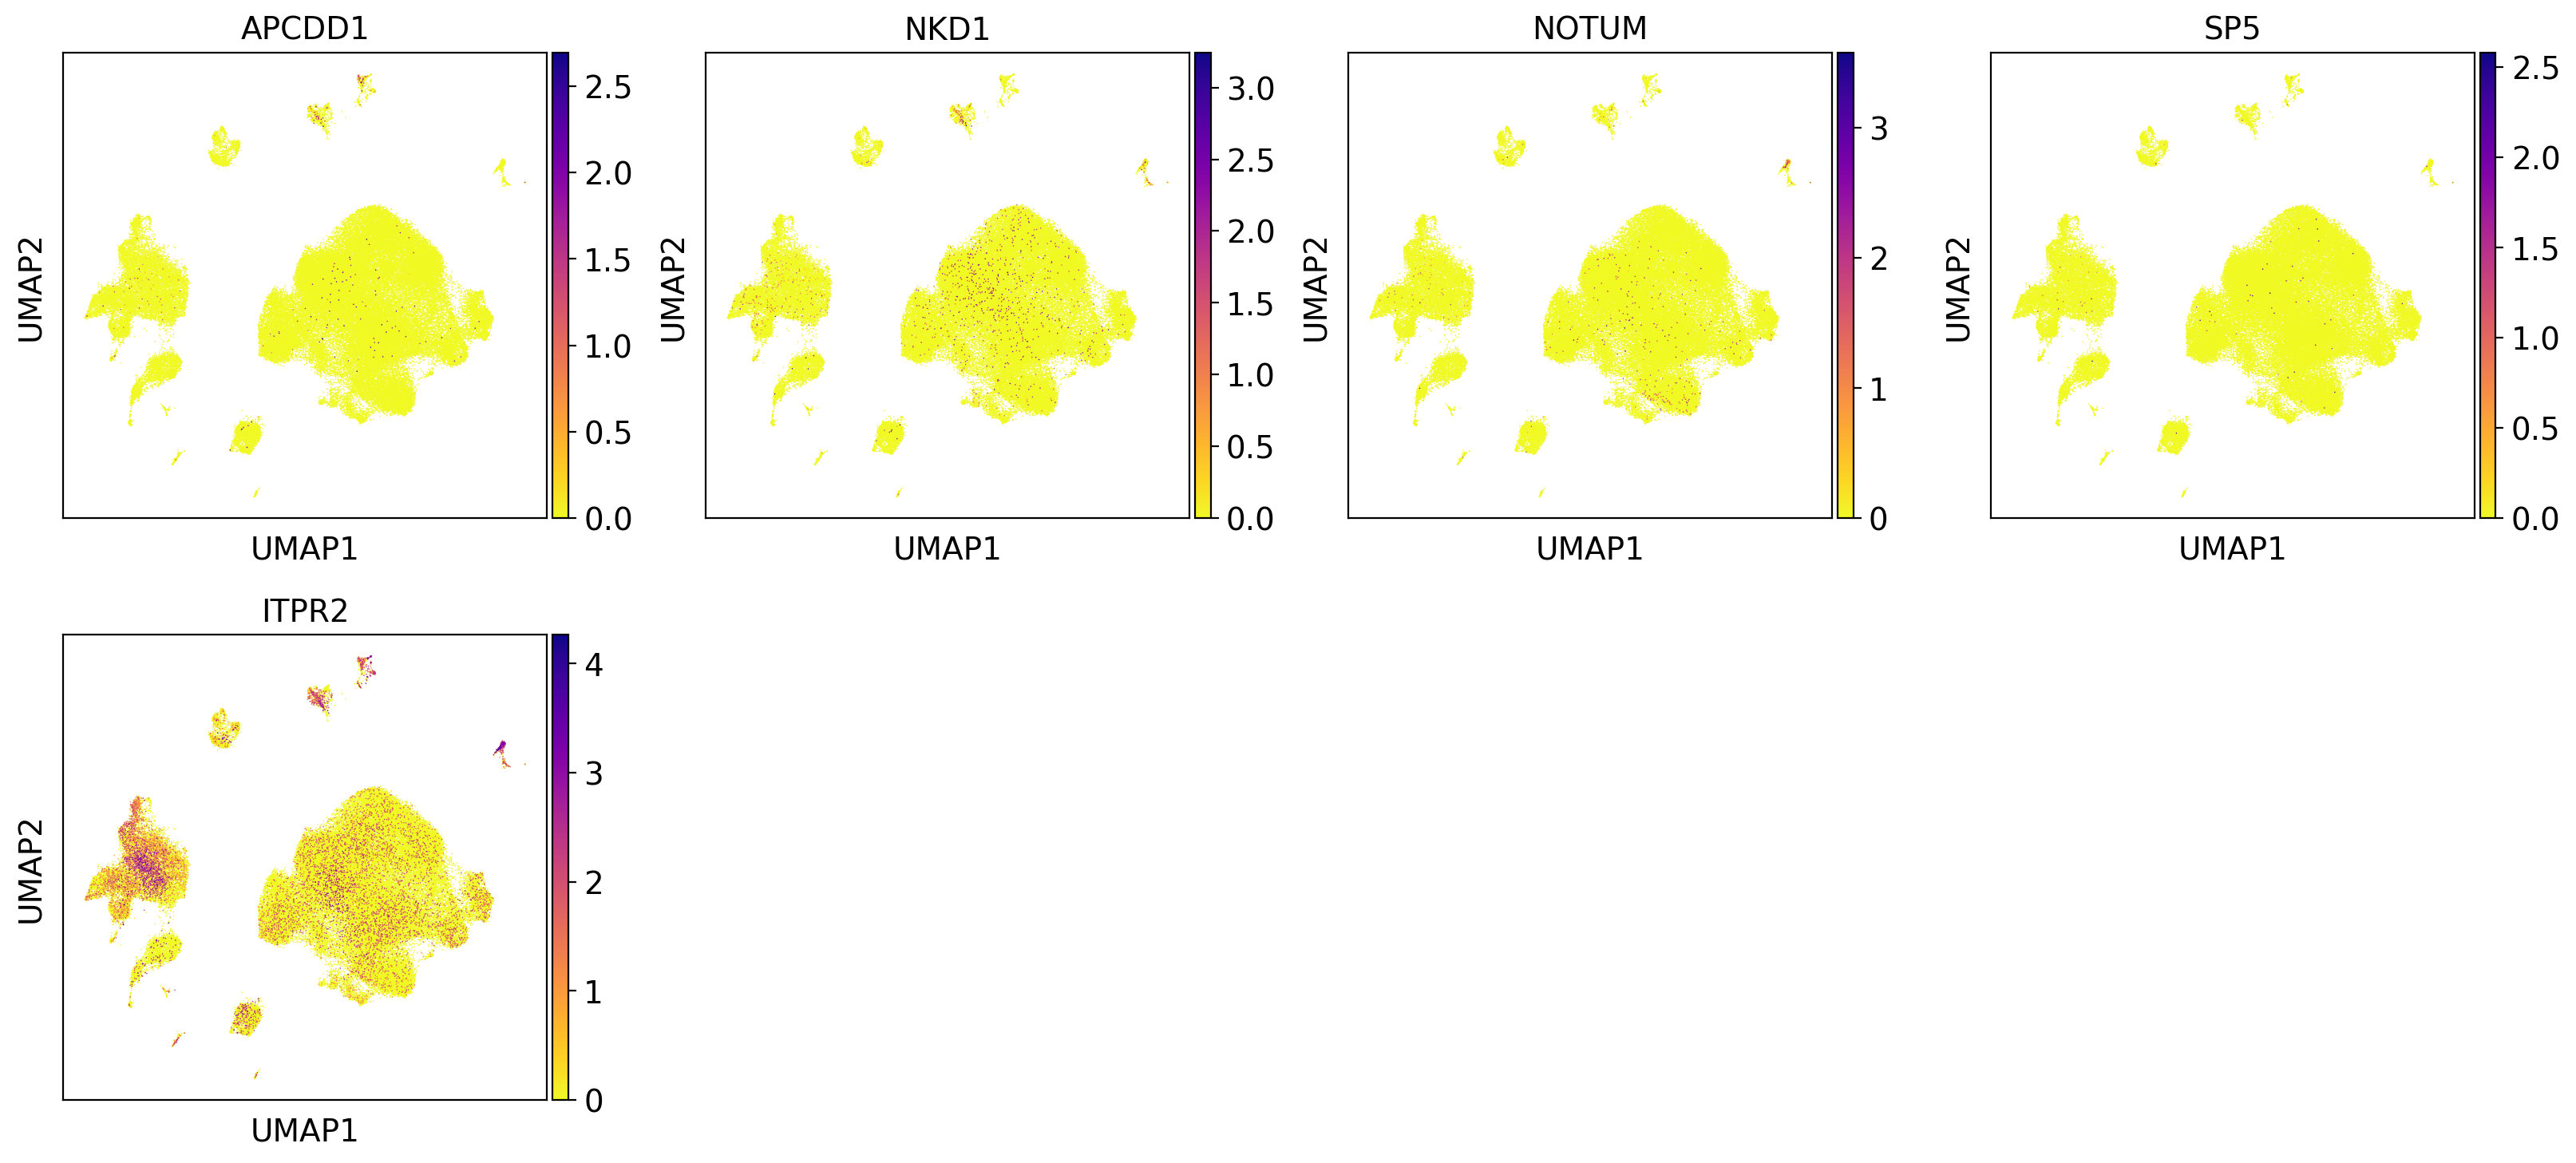

In [4]:
sc.pl.umap(adata,
           color=["APCDD1", "NKD1", "NOTUM", "SP5", "ITPR2"],
           use_raw=True,
           color_map="plasma_r"
)

In [5]:
FIG2SAVE = DIR2SAVE.joinpath("figures/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)
# set the global variable: sc.settings.figdir to save all plots
sc.settings.figdir = FIG2SAVE

### Plot only TME cells that are close to pEMT cell state

/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


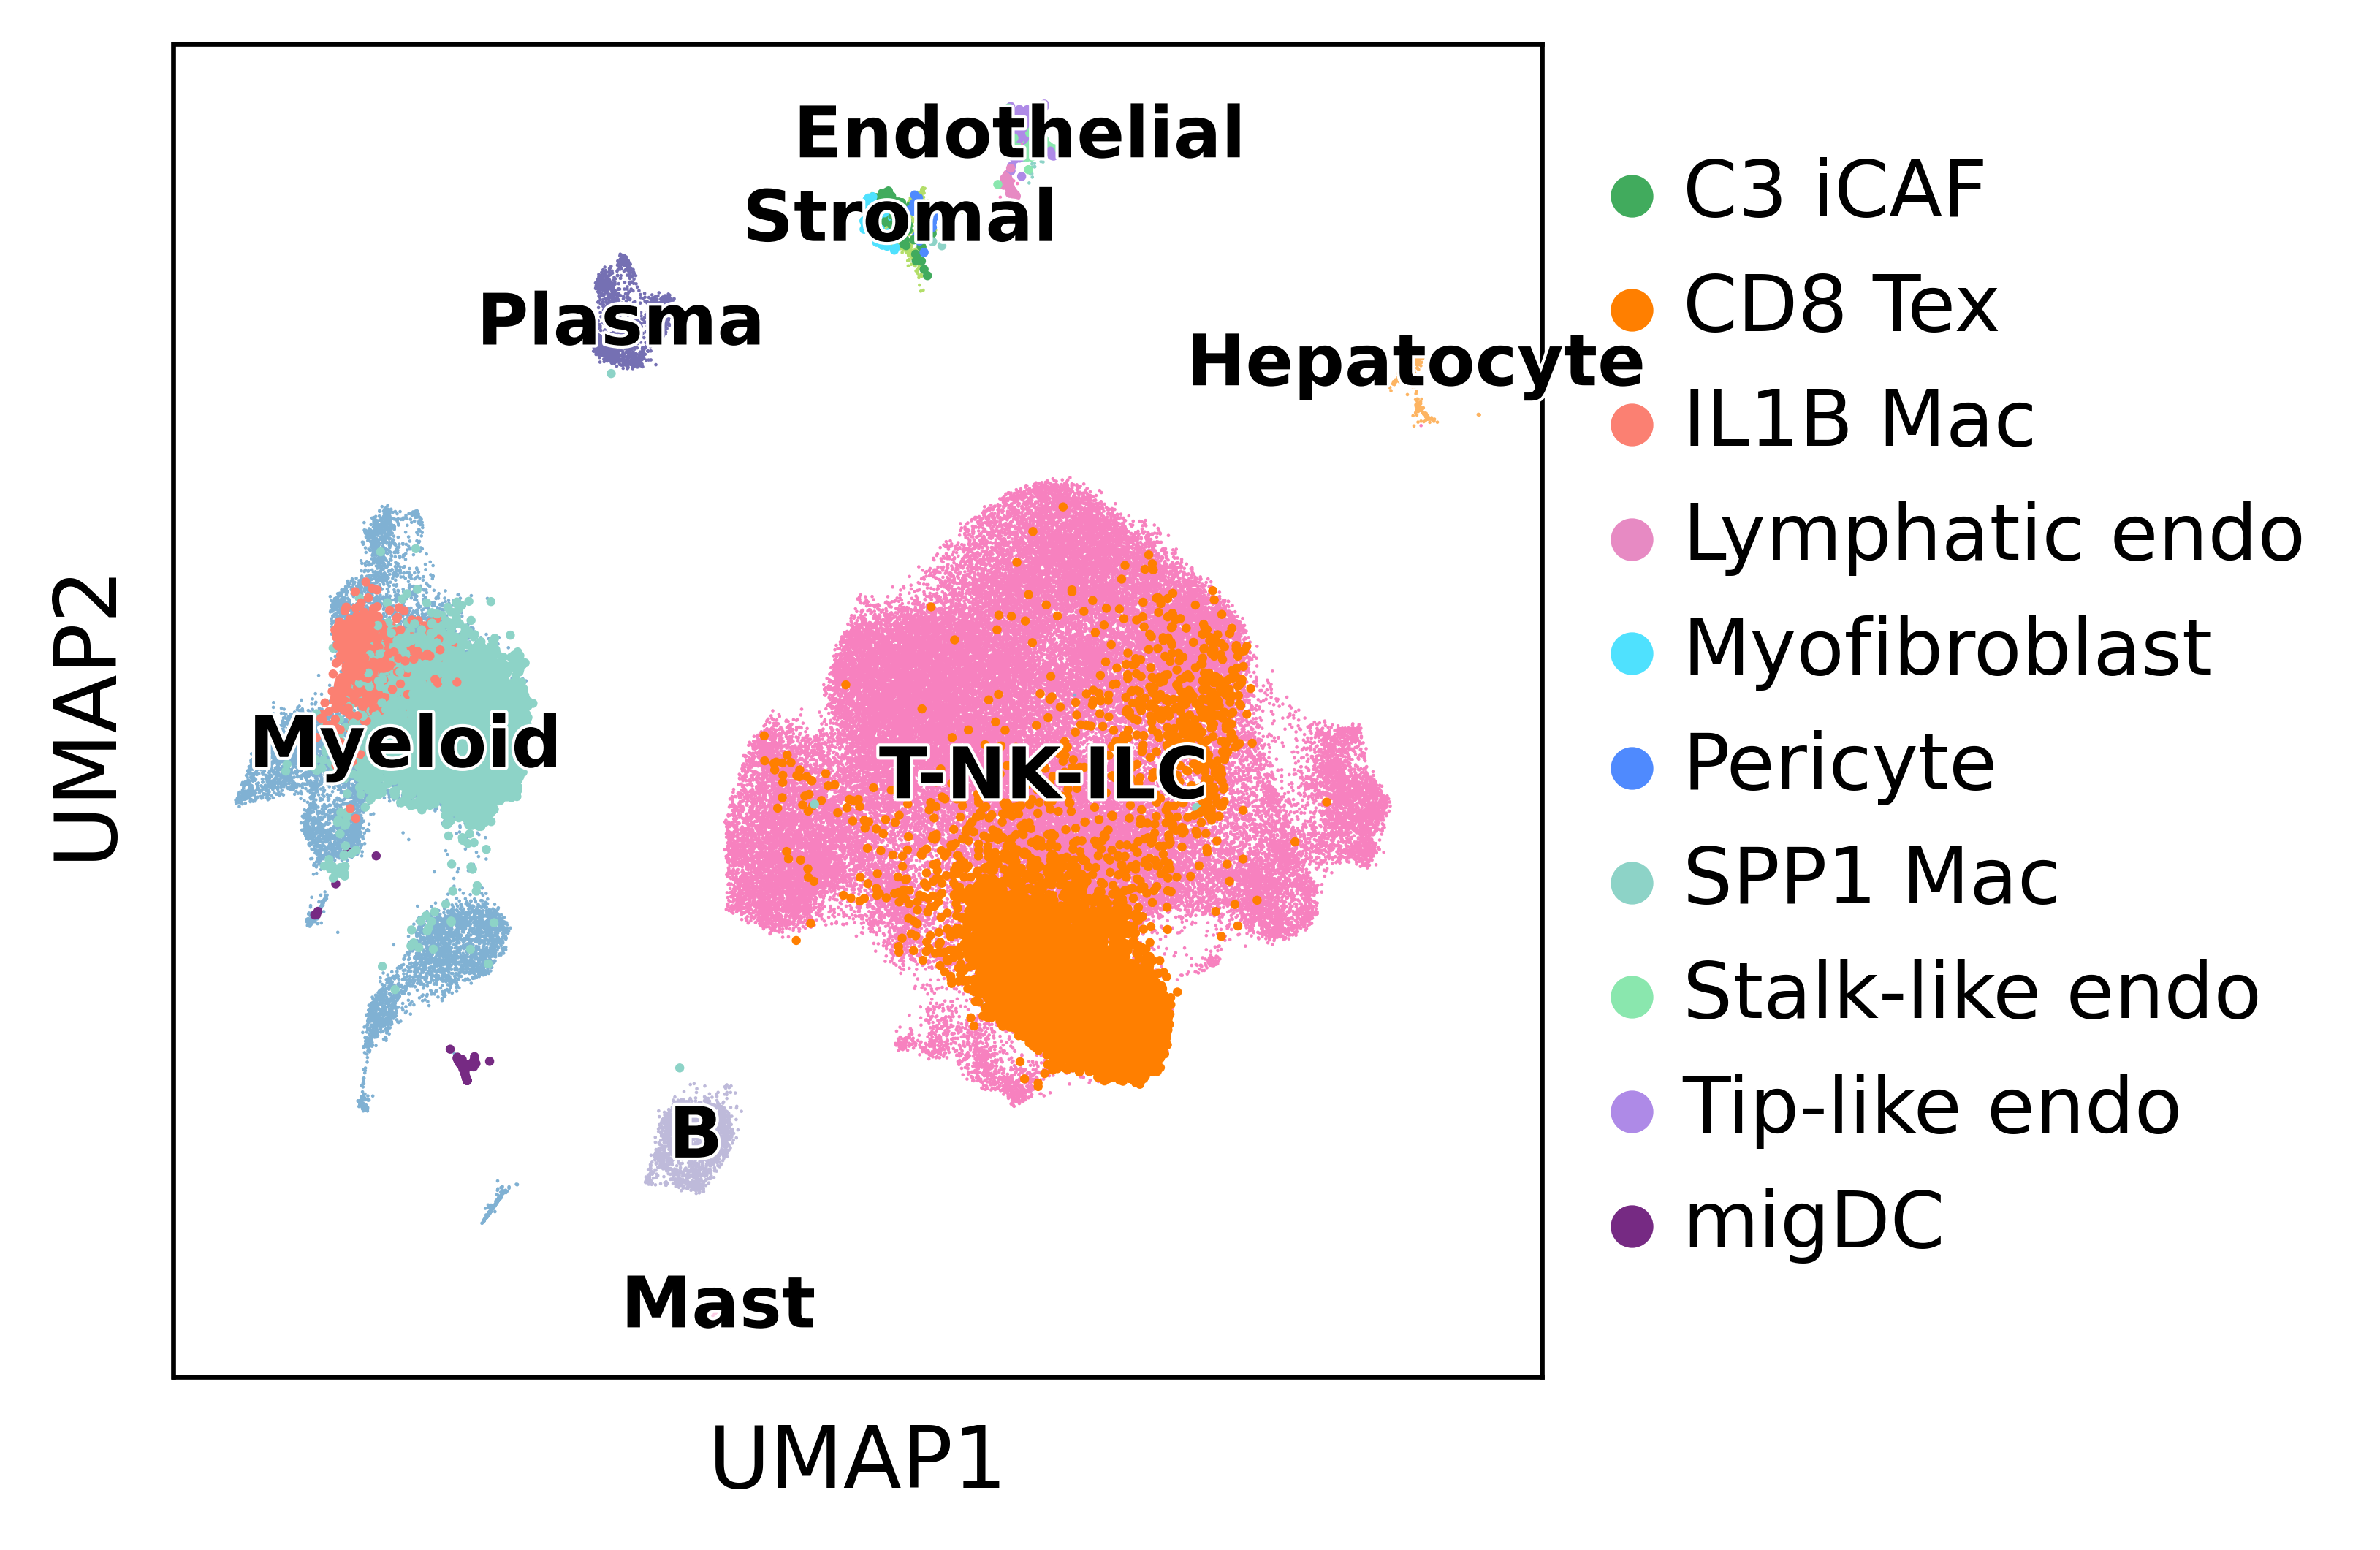

In [14]:
fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        sharey=False,
        sharex=False,
        dpi=DPI,
    )

sc.pl.umap(adata, 
                show=False, 
                color="Annotation_scVI", 
                legend_loc="on data",
                legend_fontoutline=1,
                legend_fontsize="small",
                palette=["#BEBADA",
                         "#8DD3C7",
                         "#FDB462", 
                         "#fccde5",
                         "#80B1D3",
                         "#7570B3",
                         "#B3DE69",
                         "#F781BF"
                        ],
                ax=ax
    
               )
sc.pl.umap(
    adata[adata.obs["Annotation_scVI_detailed"].isin(["SPP1 Mac", 
                                                      "IL1B Mac",
                                                      "C3 iCAF", 
                                                      "Pericyte", 
                                                      "Lymphatic endo",
                                                      "Stalk-like endo",
                                                      "Myofibroblast", 
                                                      "migDC", 
                                                      "CD8 Tex",
                                                      "Tip-like endo"
                                                     ])],
    # size=10,
    color="Annotation_scVI_detailed",
    ax=ax,
    legend_loc="right margin",
    #legend_fontsize="xx-small",
    title="",
    palette=["#41ab5d", 
             "#ff7f00", 
             "#fb8072", 
             "#e78ac3", 
             "#4fe1fe", 
             "#4f8afe", 
             "#8dd3c7", 
             "#8ae7ae",
             "#ae8ae7",
             "#762a83",
            ],
    show=False
)

plt.savefig(FIG2SAVE.joinpath("highlight_TME_subpopulations.pdf"), dpi=DPI, format="pdf", bbox_inches="tight")
plt.show()

In [15]:
FIG2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/final_object/figures')